# HIDDEN MARKOV NEURAL NETWORK: FLAG example

We study the performance of HMNN on frames prediction

## Import libraries

In [1]:
import cv2

import torch
import torch.nn as nn
import torch.nn.functional as F

import pickle

import numpy as np

import matplotlib.pyplot as plt

import random

from sklearn.decomposition import PCA

import BayesianNetwork

## Data processing

In [2]:
# Set the seed to guarantee reproducibility
seed_number = 123

random.seed(seed_number)
torch.manual_seed(seed_number)
np.random.seed(seed_number)

The file "vtflag.mpg" was downloaded from:

- https://www.cc.gatech.edu/cpl/projects/videotexture/SIGGRAPH2000/index.htm

In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])/126.

cap = cv2.VideoCapture(0)

capture = cv2.VideoCapture(r'vtflag.mpg')
frame_count = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
print('Frame count:', frame_count)

width  = 200
height = 208

FLAG = np.zeros((416, width*height))

_, frame = capture.read(cv2.COLOR_BGR2GRAY)

for i in range(0, 416):
    frame[30:60,95:200,:] = frame[0:30,95:200,:]
    grayframe = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)/126.
    
    FLAG[i, :]  = grayframe.reshape((width*height))
    
#     print('Position:', capture.get(cv2.CAP_PROP_POS_FRAMES))
    _, frame = capture.read()

Frame count: 416


In [4]:
# Dimensionality reduction with PCA
pca = PCA(0.999)

pca.fit(FLAG)
train_FLAG = pca.transform(FLAG)

In [5]:
x = train_FLAG[0:300, :]
y = train_FLAG[1:301, :]

In [6]:
np.size(x, 1)

130

## Set the hyper parameters for the training

In [7]:
# sample size
sample_size    = 36
# batch size, here we are considering the full batch
minibatch_size = 36
# number of epochs
epocs          = 10 # optimal 150
# we are sliding of one only meaning that at time 1 we
# have frames 1:36, at time 2 we have frames 2:37, and so on...
sliding = 1
# number of sequential trainings
T = 300

###########################################################
# Set the network structure
# Depth
L = 5
# Structure of the hidden units
architecture = np.array([130, 500, 20, 500, 130])

# Kernel parameter of the HMNN
pi      = 0.75
alpha_k = 0.75
sigma_k = np.exp(2)
c       = np.exp(8)

# Mixture weight for the variational dropconnect
p       = 1.0

## Training procedure

In [8]:
# Loss function
loss_function = torch.nn.MSELoss(reduction = "sum")

HMMNET = BayesianNetwork.torchHHMnet(architecture, alpha_k, sigma_k, c, pi, p, loss_function, sample_size, minibatch_size, epocs, T, sliding, workers = 1)

HMMNET.forward_pass(x, y, 1e-4)

Time  1
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  17605.526290966547  and Data score  2425.5161730877912
Time  2
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6031.491469774668  and Data score  2118.631387258542
Time  3
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6050.148407511149  and Data score  1750.7231738335076
Time  4
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6040.387354308563  and Data score  1484.6360477092217
Time  5
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6018.055098526794  and Data score  1361.8124117551815
Time  6
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6014.356929625082  and Data score  1282.7464489616686
Time

Prior score  6000.036810831647  and Data score  877.0209371580992
Time  100
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6010.0530280960675  and Data score  880.4803778431041
Time  101
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6006.442156961693  and Data score  904.8024359256616
Time  102
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6018.071803185464  and Data score  879.9727042021453
Time  103
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6010.2685214339845  and Data score  886.6176028733048
Time  104
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6003.508018797211  and Data score  853.8190115437008
Time  105
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch 

Prior score  6008.215527929998  and Data score  804.1184455497954
Time  198
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6006.730919781332  and Data score  756.0122624969572
Time  199
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6008.635139561332  and Data score  815.7306573357713
Time  200
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6006.440875044889  and Data score  733.9917574748021
Time  201
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6003.682299872922  and Data score  758.3480898899022
Time  202
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6014.078633722343  and Data score  723.0592471883798
Time  203
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  1

Epoch  10
Prior score  6009.264794689716  and Data score  121.63040692978325
Time  296
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6002.407957379895  and Data score  90.5256538865356
Time  297
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  5997.879845102603  and Data score  81.44083705434959
Time  298
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6002.63235336492  and Data score  33.72587767772607
Time  299
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6000.187366694913  and Data score  22.677886463417217
Time  300
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6004.727416056178  and Data score  8.289671821037619


The above simulation took around 20 min on a machine with CPU: 1.80GHz i7-8565U and Ram: 16Gb

## Plot the forecasted flags

Increase the epochs for a finer performance

In [12]:
%matplotlib inline

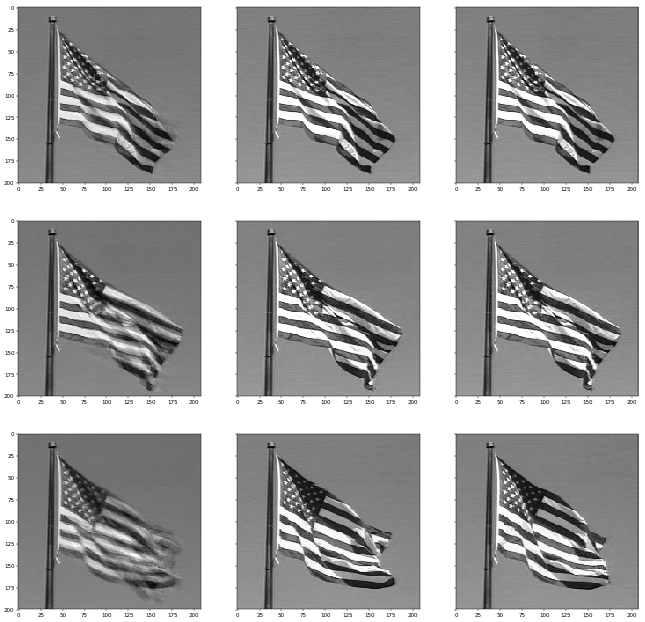

In [13]:
fig, ax = plt.subplots(3,3, figsize=(20, 20), dpi=40, sharey=True)

ax[0,0].imshow(pca.inverse_transform(HMMNET.model_list[115].performance(torch.tensor(train_FLAG[150, :]) ).data.numpy()).reshape(width, height), cmap = plt.get_cmap('gray') )
ax[0,1].imshow(pca.inverse_transform(train_FLAG[150, :]).reshape(width, height), cmap = plt.get_cmap('gray') )
ax[0,2].imshow(pca.inverse_transform(train_FLAG[151, :]).reshape(width, height), cmap = plt.get_cmap('gray') )

ax[1,0].imshow(pca.inverse_transform(HMMNET.model_list[125].performance(torch.tensor(train_FLAG[160, :])).data.numpy()).reshape(width, height), cmap = plt.get_cmap('gray') )
ax[1,1].imshow(pca.inverse_transform(train_FLAG[160, :]).reshape(width, height), cmap = plt.get_cmap('gray') )
ax[1,2].imshow(pca.inverse_transform(train_FLAG[161, :]).reshape(width, height), cmap = plt.get_cmap('gray') )

ax[2,0].imshow(pca.inverse_transform(HMMNET.model_list[170].performance(torch.tensor(train_FLAG[205, :])).data.numpy()).reshape(width, height), cmap = plt.get_cmap('gray') )
ax[2,1].imshow(pca.inverse_transform(train_FLAG[205, :]).reshape(width, height), cmap = plt.get_cmap('gray') )
ax[2,2].imshow(pca.inverse_transform(train_FLAG[206, :]).reshape(width, height), cmap = plt.get_cmap('gray') )


fig.show()